In [2]:
import importlib
import data_generation
import feature_distribution
import matplotlib.pyplot as plt
import classification
import pandas as pd

In [20]:
importlib.reload(data_generation)

dataset = data_generation.generate_dataset(100000, min_nodes=20, max_nodes=30)

In [21]:
importlib.reload(data_generation)
data_generation.save_dataset(dataset)

In [4]:
importlib.reload(classification)
feature_train, feature_test, chordal_train, chordal_test = classification.preprocessing(dataset)

In [8]:
importlib.reload(data_generation)
data_generation.load_datasets().head()

,num_vertices,num_edges,max_degree,min_degree,mean_degree,average_clustering,global_clustering,density,diameter,radius,Chordal
0,19,114,15,8,12.000000,0.663000,0.220141,0.666667,2.0,2.0,False
1,16,71,12,5,8.875000,0.581164,0.192504,0.591667,2.0,2.0,False
2,11,45,9,6,8.181818,0.798918,0.266055,0.818182,2.0,2.0,False
3,18,14,3,0,1.555556,0.000000,0.000000,0.091503,inf,inf,False
4,14,66,12,7,9.428571,0.697763,0.231041,0.725275,2.0,2.0,False


In [6]:
lr_clf = classification.logistic_regression(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
knn_clf = classification.K_nearest_neighbour(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
svm_clf = classification.support_vector_machine(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
tree_clf = classification.decision_tree(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
rf_clf = classification.random_forrest(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
xgb_clf = classification.xgboost(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)

models_list = [lr_clf, knn_clf, svm_clf, tree_clf, rf_clf, xgb_clf]

c:\Users\abhik\Anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [15:41:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



In [6]:
importlib.reload(classification)
comparison = classification.compare_models(feature_train, chordal_train, feature_test, chordal_test, models = models_list)
print(comparison)

                                               Model  Train Accuracy  \
0             LogisticRegression(solver='liblinear')           97.82   
1                             KNeighborsClassifier()           98.60   
2                                     SVC(gamma=0.1)           98.19   
3            DecisionTreeClassifier(random_state=42)           99.33   
4  RandomForestClassifier(n_estimators=1000, rand...           99.33   
5  XGBClassifier(base_score=None, booster=None, c...           99.07   

   Test Accuracy  Difference  
0          97.90       -0.07  
1          98.27        0.33  
2          98.25       -0.06  
3          98.40        0.93  
4          98.60        0.73  
5          98.66        0.40  


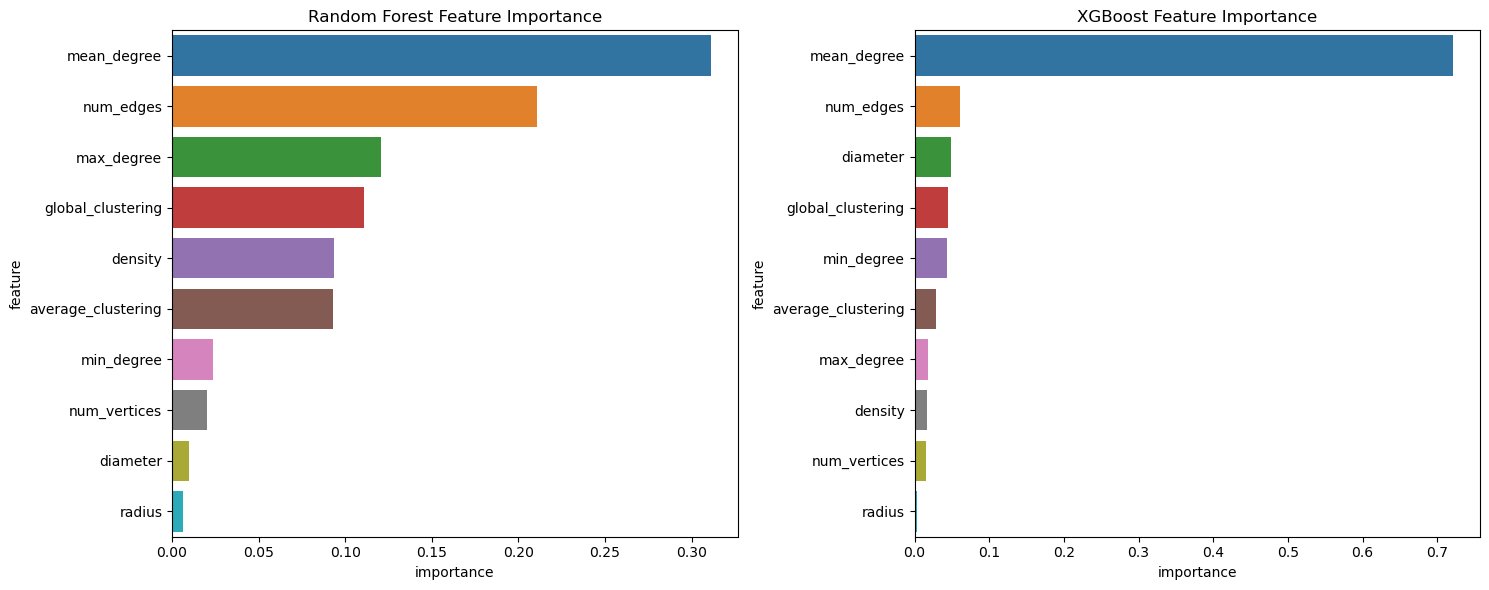

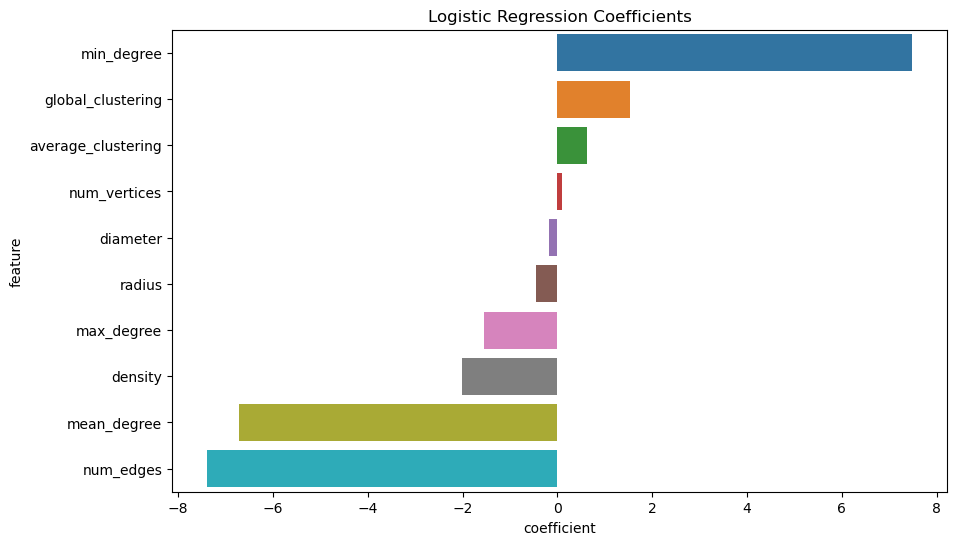

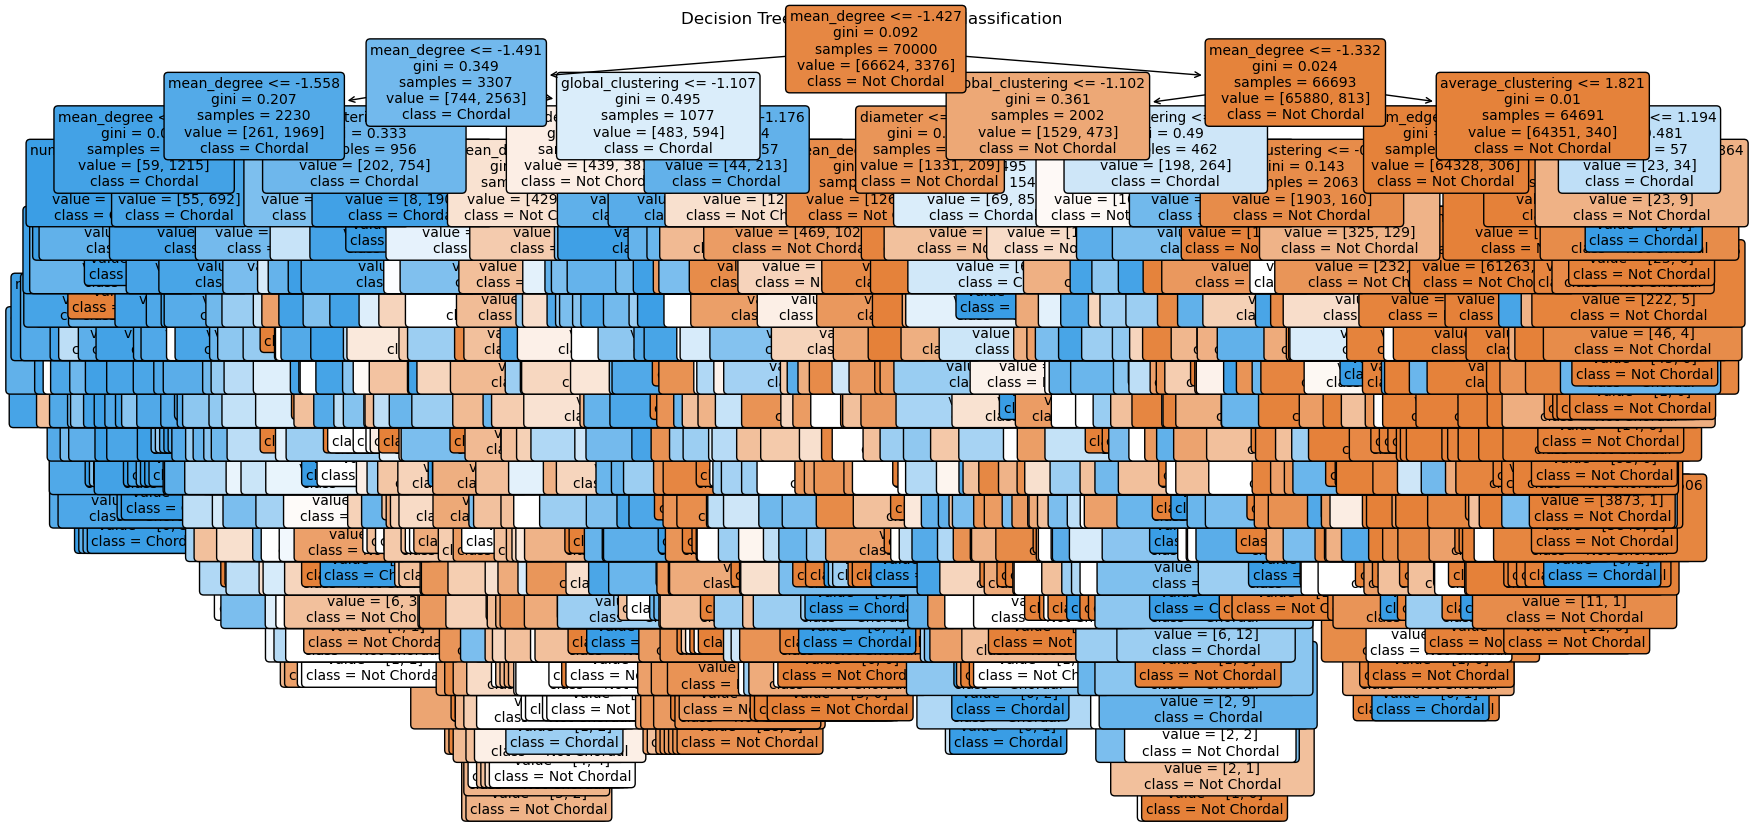

In [7]:
rf_importance, xgb_importance = classification.plot_feature_importance(feature_train, chordal_train, rf = rf_clf, xgb = xgb_clf)
lr_coefficients = classification.plot_logistic_coefficients(feature_train, chordal_train, lr = lr_clf)
tree_clf = classification.visualize_decision_tree(feature_train, chordal_train, tree_clf = tree_clf)
plt.show()

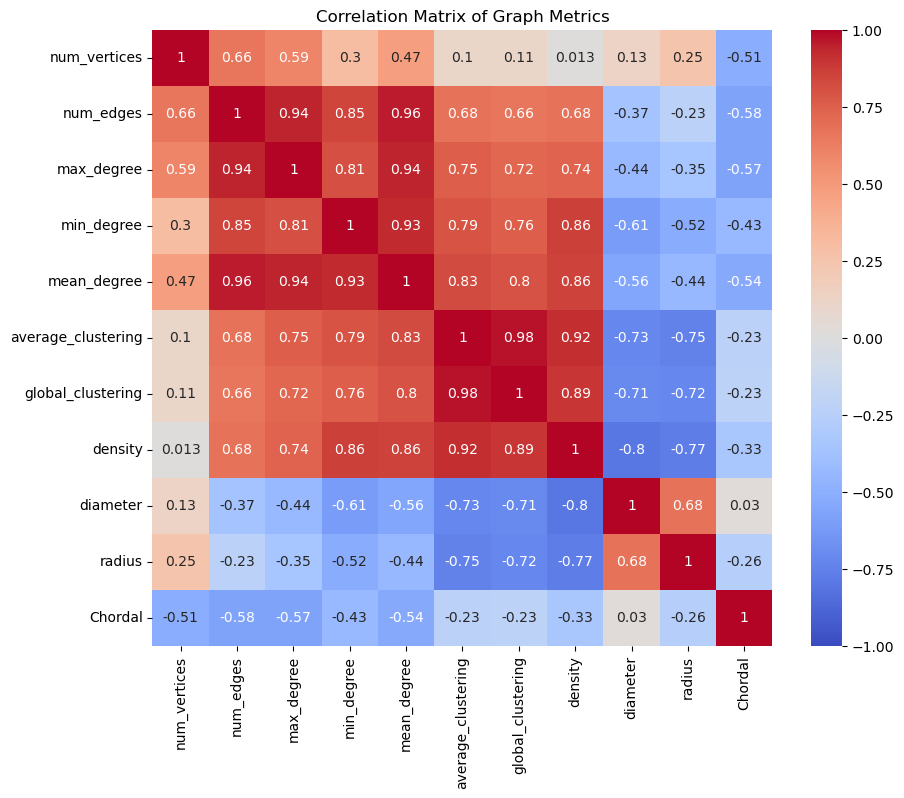

In [23]:
importlib.reload(feature_distribution)
corr = feature_distribution.correlation(dataset)
plt.show()

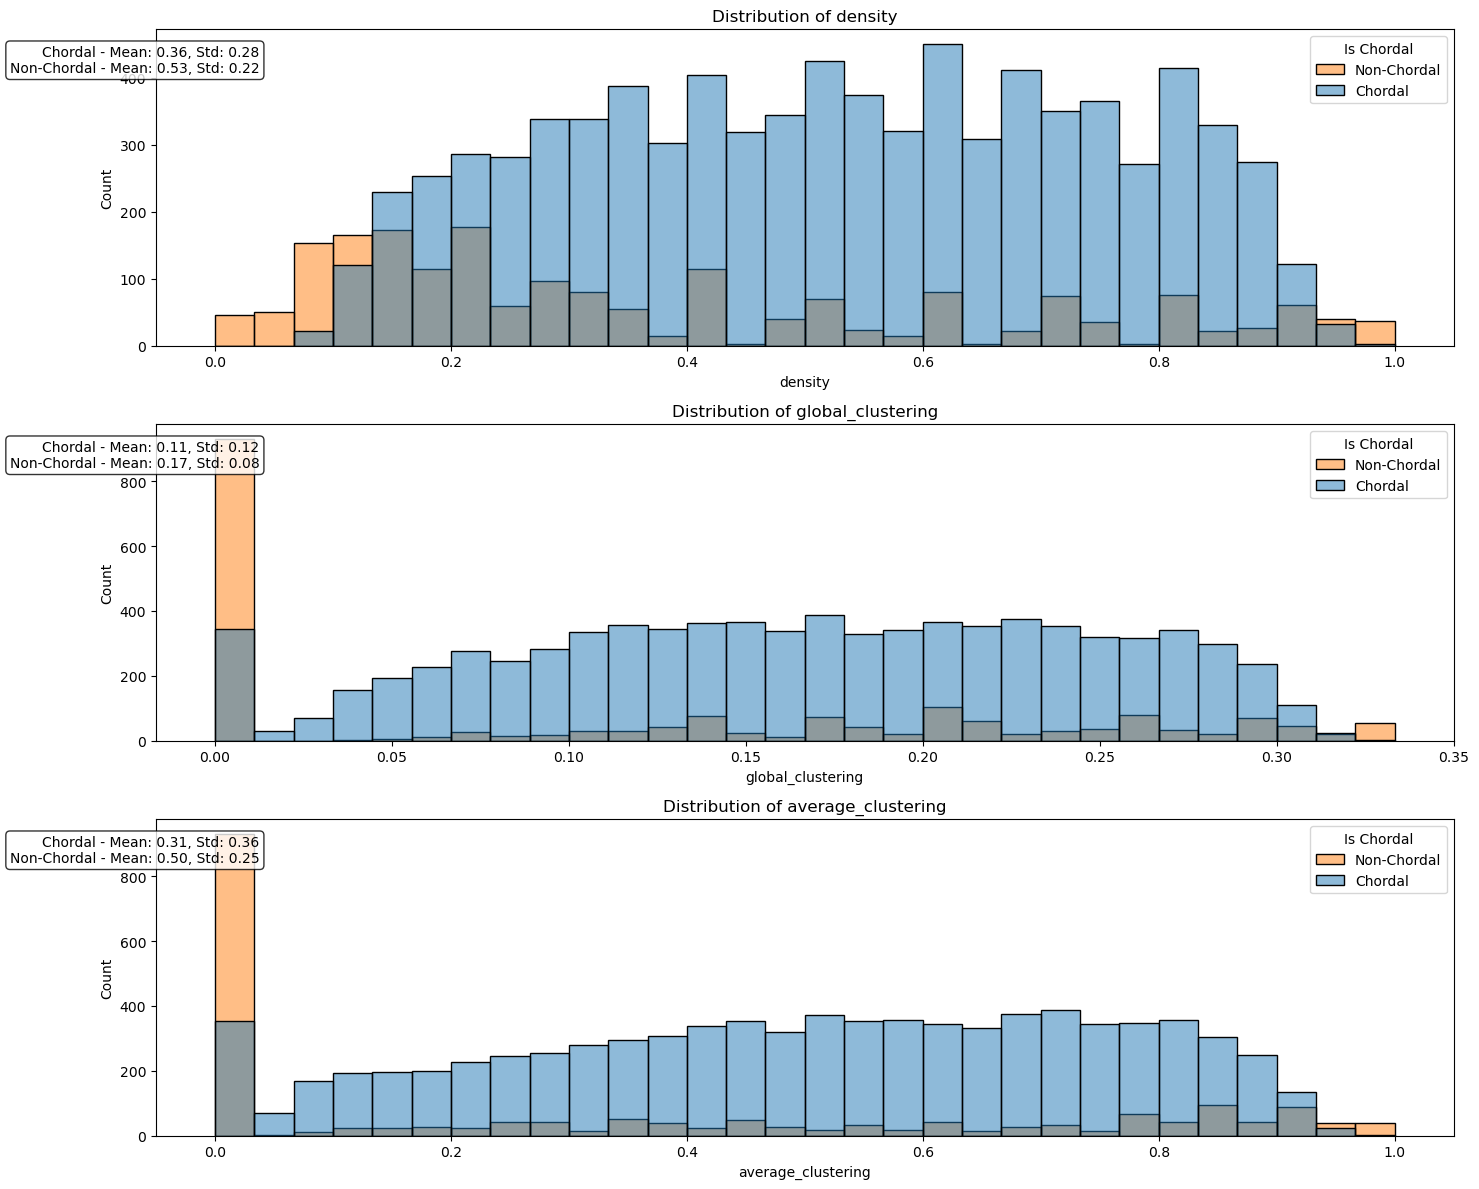

In [3]:
importlib.reload(feature_distribution)
# Select features to visualize
selected_features = ['density', 'global_clustering', 'average_clustering']
    
# Create and show the plots
fig = feature_distribution.visualise(dataset, selected_features)
plt.show()